In [59]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [ ]:
from portfolio_utils.CorrelationPortfolioSelector import CorrelationPortfolioSelector

# Sube hasta encontrar la carpeta del proyecto que contiene "src"
root = Path.cwd()

while root != root.parent and not (root / "src").exists():
    root = root.parent

sys.path.append(str(root / "src"))


# Estrategia 1

In [5]:
start_date = "2021-01-01"
end_date = "2026-02-03"

In [ ]:
tickers_by_sector = {
    "tecnologia_info": ["NVDA","AAPL","MSFT","AVGO","MU","CSCO","AMD","PLTR","IBM","LRCX"],
    "industrial": ["GE","CAT","RTX","BA","UBER","UNP","HON","DE","ETN","LMT"],
    "energia": ["XOM","CVX","COP","SLB","WMB","PSX","EOG","KMI","VLO","MPC"],
    "financieras": ["BRK-B","JPM","V","MA","BAC","WFC","GS","MS","C","AXP"],
    "real_estate": ["WELL","PLD","AMT","EQIX","SPG","O","CBRE","PSA","DLR","VTR"],
    "health_care": ["LLY","JNJ","ABBV","MRK","UNH","TMO","AMGN","ABT","GILD","ISRG"],
    "materiales": ["LIN","NEM","FCX","SHW","CRH","APD","ECL","NUE","CTVA","MLM"],
    # "consumo" puede ser discrecional (XLY) o básico/staples (XLP)
    "consumo_discrecional": ["AMZN","TSLA","HD","MCD","TJX","LOW","BKNG","SBUX","RCL","ORLY"],
    "consumo_basico": ["WMT","COST","PG","KO","PM","PEP","CL","MDLZ","MO","MNST"],
}

In [34]:
_demo_groups_ch = {
    "IT": ["0700.HK","9988.HK","1810.HK","0992.HK","2382.HK","0268.HK","2018.HK","9618.HK","9999.HK","0772.HK"],
    "Industrials": ["1919.HK","1766.HK","1800.HK","0390.HK","1186.HK","3311.HK","2039.HK","0753.HK","0670.HK","1055.HK"],
    "Energy": ["0883.HK","0857.HK","0386.HK","1088.HK","1898.HK","0135.HK","2380.HK","0916.HK","0836.HK","0902.HK"],
    "Financials": ["1398.HK","0939.HK","3988.HK","1288.HK","3328.HK","2318.HK","2628.HK","1336.HK","6066.HK","6886.HK"],
    "RealEstate": ["1109.HK","0688.HK","0960.HK","2007.HK","2202.HK","0817.HK","0813.HK","1918.HK","2777.HK","6098.HK"],
    "HealthCare": ["1093.HK","1177.HK","3692.HK","2269.HK","2359.HK","2196.HK","1877.HK","1801.HK","6185.HK","9926.HK"],
    "Materials": ["0914.HK","3323.HK","2899.HK","0358.HK","2600.HK","3993.HK","0868.HK","0968.HK","0347.HK","0323.HK"],
    "Consumer": ["9633.HK","0291.HK","0322.HK","2319.HK","0151.HK","2020.HK","2331.HK","1211.HK","6690.HK","1929.HK"],
}

In [35]:
num_tickets = len(_demo_groups_ch["IT"])
num_tickets

10

In [36]:
w = np.ones(num_tickets) / num_tickets
w 

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [37]:
prices = {}

In [38]:
for sector, tickers in _demo_groups_ch.items():
    prices[sector] = yf.download(tickers, start = start_date, end = end_date)["Close"]

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  10 of 10 completed
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  10 of 10 completed
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  10 of 10 completed
/home/rigodev/IT

In [39]:
prices

{'IT': Ticker        0268.HK     0700.HK    0772.HK   0992.HK    1810.HK    2018.HK  \
 Date                                                                           
 2021-01-04  30.299999  511.001160  60.000000  6.141582  35.250000  43.136826   
 2021-01-05  28.950001  520.819580  58.099998  6.149642  35.299999  43.964504   
 2021-01-06  28.700001  532.423096  57.349998  6.028744  33.900002  44.743504   
 2021-01-07  27.850000  507.430847  55.450001  6.093222  32.000000  43.623692   
 2021-01-08  28.299999  511.447479  56.650002  6.375316  31.950001  44.646122   
 ...               ...         ...        ...       ...        ...        ...   
 2026-01-27  13.840000  607.000000  36.759998  8.880000  35.560001  37.840000   
 2026-01-28  14.180000  621.000000  36.740002  9.070000  36.320000  37.820000   
 2026-01-29  14.030000  622.000000  36.779999  9.050000  36.619999  37.259998   
 2026-01-30  12.950000  606.000000  35.799999  8.880000  35.500000  37.000000   
 2026-02-02  12.530000

In [40]:
returns = {sector: df.pct_change().dropna() for sector, df in prices.items()}

In [41]:
returns

{'IT': Ticker       0268.HK   0700.HK   0772.HK   0992.HK   1810.HK   2018.HK  \
 Date                                                                     
 2021-01-05 -0.044554  0.019214 -0.031667  0.001312  0.001418  0.019187   
 2021-01-06 -0.008636  0.022279 -0.012909 -0.019659 -0.039660  0.017719   
 2021-01-07 -0.029617 -0.046941 -0.033130  0.010695 -0.056047 -0.025027   
 2021-01-08  0.016158  0.007916  0.021641  0.046296 -0.001562  0.023438   
 2021-01-11 -0.028269  0.031414 -0.049426 -0.065740  0.003130 -0.007634   
 ...              ...       ...       ...       ...       ...       ...   
 2026-01-27 -0.005747  0.012510 -0.007023  0.018349  0.009654  0.014477   
 2026-01-28  0.024566  0.023064 -0.000544  0.021396  0.021372 -0.000529   
 2026-01-29 -0.010578  0.001610  0.001089 -0.002205  0.008260 -0.014807   
 2026-01-30 -0.076978 -0.025723 -0.026645 -0.018785 -0.030584 -0.006978   
 2026-02-02 -0.032432 -0.012376 -0.022346  0.018018 -0.012394 -0.012432   
 
 Ticker       238

In [42]:
corr = {sector: df.corr() for sector, df in returns.items()}

In [43]:
corr_abs = {sector: df.abs() for sector, df in corr.items()}

In [44]:
weighted_corr = {sector: (w.T @ df).idxmin() for sector, df in corr_abs.items()}.values()
weighted_corr

dict_values(['0992.HK', '1919.HK', '0916.HK', '6066.HK', '0813.HK', '9926.HK', '0968.HK', '0151.HK'])

In [45]:
portfolio_tickets = list(weighted_corr)
portfolio_tickets

['0992.HK',
 '1919.HK',
 '0916.HK',
 '6066.HK',
 '0813.HK',
 '9926.HK',
 '0968.HK',
 '0151.HK']

In [46]:
num_tickets_portfolio = len(portfolio_tickets)

w_portfolio = np.ones(num_tickets_portfolio) / num_tickets_portfolio

In [47]:
prices_portfolio = yf.download(portfolio_tickets, start = start_date, end = end_date)["Close"]
prices_portfolio.head()

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[                       0%                       ]/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a futur

Ticker,0151.HK,0813.HK,0916.HK,0968.HK,0992.HK,1919.HK,6066.HK,9926.HK
Date,,,,,,,,
2021-01-04,4.461149,21.025768,7.595243,18.116337,6.141581,3.506784,8.555151,39.799999
2021-01-05,4.714713,20.890118,7.851362,17.677687,6.149641,3.596701,8.523407,43.000000
2021-01-06,4.580008,20.935333,8.867004,17.633823,6.028743,3.665868,9.190042,41.500000
2021-01-07,4.429453,20.844902,10.156429,18.949780,6.093222,3.617451,8.936085,41.900002
2021-01-08,4.492844,20.844902,10.227082,19.388433,6.375316,3.755785,8.999575,44.450001


In [48]:
returns_portfolio = prices_portfolio.pct_change().dropna()

In [49]:
corr_portfolio = returns_portfolio.corr()
corr_portfolio

Ticker,0151.HK,0813.HK,0916.HK,0968.HK,0992.HK,1919.HK,6066.HK,9926.HK
Ticker,,,,,,,,
0151.HK,1.000000,0.141975,0.123095,0.136716,0.159761,0.190479,0.220935,0.104441
0813.HK,0.141975,1.000000,0.146511,0.204730,0.157894,0.101336,0.533528,0.113862
0916.HK,0.123095,0.146511,1.000000,0.422817,0.265169,0.321954,0.360052,0.212411
0968.HK,0.136716,0.204730,0.422817,1.000000,0.336586,0.236210,0.412599,0.261508
0992.HK,0.159761,0.157894,0.265169,0.336586,1.000000,0.234887,0.363360,0.190747
1919.HK,0.190479,0.101336,0.321954,0.236210,0.234887,1.000000,0.258962,0.161845
6066.HK,0.220935,0.533528,0.360052,0.412599,0.363360,0.258962,1.000000,0.241995
9926.HK,0.104441,0.113862,0.212411,0.261508,0.190747,0.161845,0.241995,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

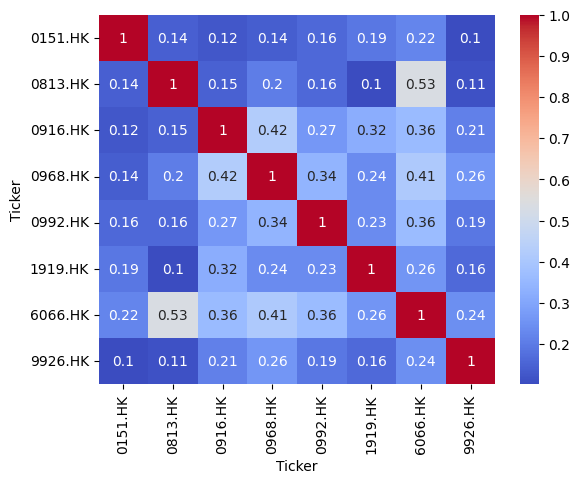

In [50]:
sns.heatmap(corr_portfolio, annot=True, cmap="coolwarm")

In [51]:
final_tickets = (w_portfolio.T @ corr_portfolio).nsmallest(4).index.to_list()
final_tickets

['0151.HK', '9926.HK', '0813.HK', '1919.HK']

In [52]:
final_prices = yf.download(final_tickets, start = start_date, end = end_date)["Close"]
final_prices.head()

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_

Ticker,0151.HK,0813.HK,1919.HK,9926.HK
Date,,,,
2021-01-04,4.461149,21.025768,3.506784,39.799999
2021-01-05,4.714713,20.890118,3.596701,43.000000
2021-01-06,4.580008,20.935333,3.665868,41.500000
2021-01-07,4.429453,20.844902,3.617451,41.900002
2021-01-08,4.492844,20.844902,3.755785,44.450001


In [53]:
final_returns = final_prices.pct_change().dropna()
final_returns

Ticker,0151.HK,0813.HK,1919.HK,9926.HK
Date,,,,
2021-01-05,0.056838,-0.006452,0.025641,0.080402
2021-01-06,-0.028571,0.002164,0.019231,-0.034884
2021-01-07,-0.032872,-0.004320,-0.013208,0.009639
2021-01-08,0.014311,0.000000,0.038241,0.060859
2021-01-11,0.017637,0.019523,-0.046041,0.023622
...,...,...,...,...
2026-01-27,0.008715,-0.033981,0.017241,0.011597
2026-01-28,0.017279,0.040201,0.019160,-0.004409
2026-01-29,0.010616,0.231884,0.011569,-0.023029


In [52]:
num_final = len(final_tickets)

w_final = np.ones(num_final) / num_final

<Axes: xlabel='Ticker', ylabel='Ticker'>

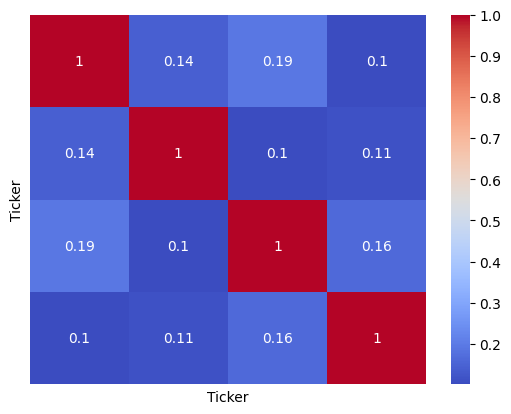

In [54]:
final_corr = final_returns.corr()
sns.heatmap(final_corr, annot=True, cmap = "coolwarm", xticklabels=False, yticklabels=False)

In [58]:
corr_total = np.tril(final_corr, k=-1).sum()
corr_total

np.float64(0.8139386172200729)

# Estretegia 2

In [65]:
prices_total = pd.concat(prices.values(), axis=1)
prices_total

Ticker,AAPL,AMD,AVGO,CSCO,IBM,LRCX,MSFT,MU,NVDA,PLTR,...,CL,COST,KO,MDLZ,MNST,MO,PEP,PG,PM,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,125.974487,92.300003,38.253113,38.035801,96.335716,45.263142,208.882202,72.250359,13.076725,23.370001,...,74.507492,359.197815,45.391956,51.072968,45.299999,27.662678,123.652840,120.756126,63.986908,45.634518
2021-01-05,127.531982,92.769997,38.512192,38.053097,98.045738,46.828350,209.083740,75.382332,13.367160,24.600000,...,74.675339,355.030853,44.892960,51.125885,45.709999,27.608488,124.021370,121.527206,64.685669,45.391602
2021-01-06,123.239059,90.330002,38.274696,38.416500,100.494148,47.012039,203.662308,75.235985,12.579124,23.540001,...,72.669746,349.626068,43.464775,51.028881,45.349998,28.055536,122.504295,122.806442,64.772041,45.675007
2021-01-07,127.444397,95.160004,39.887703,38.901039,100.260956,48.713608,209.457947,77.187393,13.306578,25.000000,...,72.272156,347.641876,42.982986,50.931889,46.750000,28.299385,122.110069,121.658646,65.148888,45.671883
2021-01-08,128.544373,94.580002,40.090103,38.987553,99.903397,47.498734,210.734131,75.538445,13.239518,25.200001,...,72.758102,349.550537,43.946571,51.311054,47.494999,28.170692,123.575684,121.606010,65.235245,45.665657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,258.269989,252.029999,332.790009,78.680000,293.859985,238.460007,480.579987,410.239990,188.520004,165.699997,...,85.760002,968.956299,73.550003,59.020000,81.410004,63.619999,148.779999,148.339996,178.880005,116.940002
2026-01-28,256.440002,252.740005,333.239990,78.959999,294.160004,239.580002,481.630005,435.279999,191.520004,157.350006,...,85.000000,959.469238,73.059998,57.730000,80.919998,63.130001,148.500000,147.339996,178.589996,116.570000
2026-01-29,258.279999,252.179993,330.730011,78.430000,309.239990,248.169998,433.500000,435.790009,192.509995,151.860001,...,85.239998,951.589966,73.430000,57.310001,80.040001,59.759998,148.690002,149.899994,177.889999,117.410004


In [ ]:
w_total = np.ones(prices_total.shape[1]) / prices_total.shape[1]
w_total

array([0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111111,
       0.01111111, 0.01111111, 0.01111111, 0.01111111, 0.01111

In [66]:
total_returns = prices_total.pct_change().dropna()
total_returns

Ticker,AAPL,AMD,AVGO,CSCO,IBM,LRCX,MSFT,MU,NVDA,PLTR,...,CL,COST,KO,MDLZ,MNST,MO,PEP,PG,PM,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.012364,0.005092,0.006773,0.000455,0.017751,0.034580,0.000965,0.043349,0.022210,0.052632,...,0.002253,-0.011601,-0.010993,0.001036,0.009051,-0.001959,0.002980,0.006385,0.010920,-0.005323
2021-01-06,-0.033662,-0.026302,-0.006167,0.009550,0.024972,0.003923,-0.025929,-0.001941,-0.058953,-0.043089,...,-0.026857,-0.015223,-0.031813,-0.001897,-0.007876,0.016192,-0.012232,0.010526,0.001335,0.006244
2021-01-07,0.034123,0.053471,0.042143,0.012613,-0.002320,0.036194,0.028457,0.025937,0.057830,0.062022,...,-0.005471,-0.005675,-0.011085,-0.001901,0.030871,0.008692,-0.003218,-0.009346,0.005818,-0.000068
2021-01-08,0.008631,-0.006095,0.005074,0.002224,-0.003566,-0.024939,0.006093,-0.021363,-0.005040,0.008000,...,0.006724,0.005490,0.022418,0.007445,0.015936,-0.004548,0.012002,-0.000433,0.001326,-0.000136
2021-01-11,-0.023249,0.028230,0.000269,0.006658,0.000389,0.029603,-0.009699,0.016146,0.025966,0.028968,...,-0.002550,-0.016030,-0.017228,-0.018904,-0.021581,-0.005771,-0.014496,-0.006773,-0.009388,0.004501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,0.011198,0.002865,0.024442,0.021685,-0.008335,0.069951,0.021902,0.054358,0.010994,-0.010569,...,0.006573,-0.007559,0.013644,0.008372,0.003080,0.010162,0.019949,-0.007693,0.017752,-0.005950
2026-01-28,-0.007086,0.002817,0.001352,0.003559,0.001021,0.004697,0.002185,0.061037,0.015913,-0.050392,...,-0.008862,-0.009791,-0.006662,-0.021857,-0.006019,-0.007702,-0.001882,-0.006741,-0.001621,-0.003164
2026-01-29,0.007175,-0.002216,-0.007532,-0.006712,0.051265,0.035854,-0.099931,0.001172,0.005169,-0.034890,...,0.002824,-0.008212,0.005064,-0.007275,-0.010875,-0.053382,0.001279,0.017375,-0.003920,0.007206


In [77]:
corr_total = total_returns.corr()
corr_total

Ticker,AAPL,AMD,AVGO,CSCO,IBM,LRCX,MSFT,MU,NVDA,PLTR,...,CL,COST,KO,MDLZ,MNST,MO,PEP,PG,PM,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.499901,0.464485,0.471120,0.279750,0.517365,0.614599,0.412438,0.516093,0.384926,...,0.156019,0.466942,0.266985,0.250551,0.351540,0.115761,0.280998,0.241925,0.162080,0.291811
AMD,0.499901,1.000000,0.546864,0.379919,0.241059,0.662292,0.536719,0.570685,0.695775,0.440746,...,-0.043990,0.344160,0.030942,0.083202,0.234009,-0.006183,0.037314,0.017507,0.022286,0.133153
AVGO,0.464485,0.546864,1.000000,0.418023,0.259054,0.665184,0.505012,0.615526,0.643892,0.383813,...,-0.038446,0.351675,0.017487,0.062474,0.166876,0.009999,0.035018,0.015792,0.031683,0.146421
CSCO,0.471120,0.379919,0.418023,1.000000,0.375941,0.416301,0.438721,0.377001,0.367562,0.257848,...,0.209840,0.392371,0.328989,0.258453,0.305329,0.231225,0.300748,0.275879,0.243721,0.317301
IBM,0.279750,0.241059,0.259054,0.375941,1.000000,0.306844,0.173847,0.244885,0.183845,0.142128,...,0.237211,0.263300,0.284915,0.247415,0.176229,0.177850,0.242994,0.279643,0.231058,0.217206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MO,0.115761,-0.006183,0.009999,0.231225,0.177850,-0.011159,0.092456,0.001303,-0.038221,0.015810,...,0.352860,0.183237,0.395277,0.353510,0.225375,1.000000,0.332342,0.345485,0.529507,0.218601
PEP,0.280998,0.037314,0.035018,0.300748,0.242994,0.080795,0.185380,0.024652,0.016557,-0.035134,...,0.585591,0.349385,0.688705,0.668569,0.489517,0.332342,1.000000,0.615780,0.327909,0.319196
PG,0.241925,0.017507,0.015792,0.275879,0.279643,0.043225,0.181482,-0.010652,0.001305,-0.046711,...,0.710666,0.380979,0.631524,0.620033,0.357950,0.345485,0.615780,1.000000,0.380694,0.358485


In [78]:
corr_total_abs = corr_total.abs()
corr_total_abs

Ticker,AAPL,AMD,AVGO,CSCO,IBM,LRCX,MSFT,MU,NVDA,PLTR,...,CL,COST,KO,MDLZ,MNST,MO,PEP,PG,PM,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.499901,0.464485,0.471120,0.279750,0.517365,0.614599,0.412438,0.516093,0.384926,...,0.156019,0.466942,0.266985,0.250551,0.351540,0.115761,0.280998,0.241925,0.162080,0.291811
AMD,0.499901,1.000000,0.546864,0.379919,0.241059,0.662292,0.536719,0.570685,0.695775,0.440746,...,0.043990,0.344160,0.030942,0.083202,0.234009,0.006183,0.037314,0.017507,0.022286,0.133153
AVGO,0.464485,0.546864,1.000000,0.418023,0.259054,0.665184,0.505012,0.615526,0.643892,0.383813,...,0.038446,0.351675,0.017487,0.062474,0.166876,0.009999,0.035018,0.015792,0.031683,0.146421
CSCO,0.471120,0.379919,0.418023,1.000000,0.375941,0.416301,0.438721,0.377001,0.367562,0.257848,...,0.209840,0.392371,0.328989,0.258453,0.305329,0.231225,0.300748,0.275879,0.243721,0.317301
IBM,0.279750,0.241059,0.259054,0.375941,1.000000,0.306844,0.173847,0.244885,0.183845,0.142128,...,0.237211,0.263300,0.284915,0.247415,0.176229,0.177850,0.242994,0.279643,0.231058,0.217206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MO,0.115761,0.006183,0.009999,0.231225,0.177850,0.011159,0.092456,0.001303,0.038221,0.015810,...,0.352860,0.183237,0.395277,0.353510,0.225375,1.000000,0.332342,0.345485,0.529507,0.218601
PEP,0.280998,0.037314,0.035018,0.300748,0.242994,0.080795,0.185380,0.024652,0.016557,0.035134,...,0.585591,0.349385,0.688705,0.668569,0.489517,0.332342,1.000000,0.615780,0.327909,0.319196
PG,0.241925,0.017507,0.015792,0.275879,0.279643,0.043225,0.181482,0.010652,0.001305,0.046711,...,0.710666,0.380979,0.631524,0.620033,0.357950,0.345485,0.615780,1.000000,0.380694,0.358485


In [85]:
tickets_final_new = (w_total @ corr_total).nsmallest(4).keys().tolist()
tickets_final_new

['UNH', 'NEM', 'LLY', 'MRK']

In [86]:
prices_portfolio_final = yf.download(tickets_final_new, start = start_date, end = end_date)["Close"]
prices_portfolio_final

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  4 of 4 completed


Ticker,LLY,MRK,NEM,UNH
Date,,,,
2021-01-04,157.056000,65.912682,53.928226,322.147308
2021-01-05,157.834198,66.026665,54.167336,317.815186
2021-01-06,155.936172,67.068756,55.713013,331.152588
2021-01-07,157.369186,68.403938,55.627632,336.461884
2021-01-08,157.919571,67.597961,53.620792,334.950165
...,...,...,...,...
2026-01-27,1039.510010,107.919998,127.000000,282.700012
2026-01-28,1023.799988,106.900002,131.949997,294.019989
2026-01-29,1024.140015,108.339996,126.930000,292.290009


<Axes: xlabel='Ticker', ylabel='Ticker'>

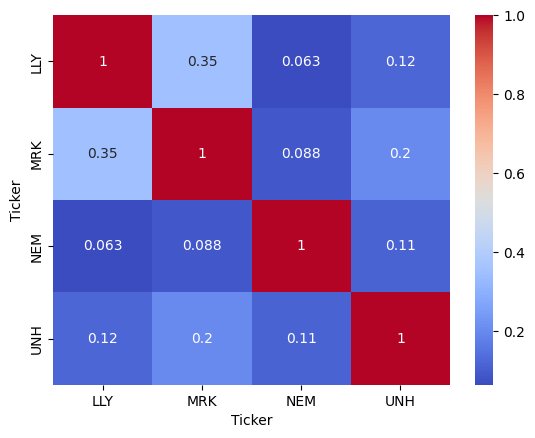

In [88]:
returns_portfolio_final = prices_portfolio_final.pct_change().dropna()

corr = returns_portfolio_final.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")

In [90]:
corr_total = np.tril(corr, k=-1).sum()
corr_total

np.float64(0.9344683445207091)

### Chunk independiente reusable: minima correlacion por grupos

Este bloque generaliza el flujo de seleccion por sectores (o cualquier agrupacion) y permite construir/actualizar portafolios de minima correlacion.


In [ ]:
_demo_groups_mx = {
    "industriales": ["GAPB.MX","ASURB.MX","OMAB.MX","PINFRA.MX","TRAXIONA.MX","VOLARA.MX","ALFAA.MX","KUOB.MX","GISSA.MX"],
    "financieras":  ["GFNORTEO.MX","GFINBURO.MX","BBAJIOO.MX","RA.MX","GENTERA.MX","Q.MX","BOLSAA.MX","VALUEGFO.MX","ACTINVRB.MX"],
    "real_estate":  ["FUNO11.MX","FMTY14.MX","TERRA13.MX","FIBRAMQ12.MX","FSHOP13.MX","DANHOS13.MX","FIHO12.MX","FIBRAHD15.MX","FPLUS16.MX","FNOVA17.MX"],
    "health_care":  ["MEDICA.MX","FRAGUA.MX","LABB.MX"],
    "materiales":   ["GMEXICOB.MX","CEMEXCPO.MX","PEOLES.MX","ORBIA.MX","ALPEKA.MX","GCC.MX","VITROA.MX","LAMOSA.MX","ICHB.MX","SIMECB.MX"],
    "consumo":      ["WALMEX.MX","FEMSAUBD.MX","BIMBOA.MX","KOFUBL.MX","ALSEA.MX","CUERVO.MX","GRUMAB.MX","HERDEZ.MX","LALA.MX","ELEKTRA.MX"],
    "energia":      ["VISTA.MX"],  # si quieres incluir FCFE18 (FIBRA E): agrega su ticker según tu feed
    # "it": []  # usualmente vacío si exiges mexicanas+acciones comunes
}

In [ ]:
_demo_groups_ch = {
    "IT": ["0700.HK","9988.HK","1810.HK","0992.HK","2382.HK","0268.HK","2018.HK","9618.HK","9999.HK","0772.HK"],
    "Industrials": ["1919.HK","1766.HK","1800.HK","0390.HK","1186.HK","3311.HK","2039.HK","0753.HK","0670.HK","1055.HK"],
    "Energy": ["0883.HK","0857.HK","0386.HK","1088.HK","1898.HK","0135.HK","2380.HK","0916.HK","0836.HK","0902.HK"],
    "Financials": ["1398.HK","0939.HK","3988.HK","1288.HK","3328.HK","2318.HK","2628.HK","1336.HK","6066.HK","6886.HK"],
    "RealEstate": ["1109.HK","0688.HK","0960.HK","2007.HK","2202.HK","0817.HK","0813.HK","1918.HK","2777.HK","6098.HK"],
    "HealthCare": ["1093.HK","1177.HK","3692.HK","2269.HK","2359.HK","2196.HK","1877.HK","1801.HK","6185.HK","9926.HK"],
    "Materials": ["0914.HK","3323.HK","2899.HK","0358.HK","2600.HK","3993.HK","0868.HK","0968.HK","0347.HK","0323.HK"],
    "Consumer": ["9633.HK","0291.HK","0322.HK","2319.HK","0151.HK","2020.HK","2331.HK","1211.HK","6690.HK","1929.HK"],
}

In [ ]:
_demo_groups_us = {
    "tecnologia_info": ["NVDA","AAPL","MSFT","AVGO","MU","CSCO","AMD","PLTR","IBM","LRCX"],
    "industrial": ["GE","CAT","RTX","BA","UBER","UNP","HON","DE","ETN","LMT"],
    "energia": ["XOM","CVX","COP","SLB","WMB","PSX","EOG","KMI","VLO","MPC"],
    "financieras": ["BRK-B","JPM","V","MA","BAC","WFC","GS","MS","C","AXP"],
    "real_estate": ["WELL","PLD","AMT","EQIX","SPG","O","CBRE","PSA","DLR","VTR"],
    "health_care": ["LLY","JNJ","ABBV","MRK","UNH","TMO","AMGN","ABT","GILD","ISRG"],
    "materiales": ["LIN","NEM","FCX","SHW","CRH","APD","ECL","NUE","CTVA","MLM"],
    # "consumo" puede ser discrecional (XLY) o básico/staples (XLP)
    "consumo_discrecional": ["AMZN","TSLA","HD","MCD","TJX","LOW","BKNG","SBUX","RCL","ORLY"],
    "consumo_basico": ["WMT","COST","PG","KO","PM","PEP","CL","MDLZ","MO","MNST"],
}

In [ ]:
demo_groups_all_flat = {
    **{f"mx_{k}": v for k, v in _demo_groups_mx.items()},
    **{f"ch_{k}": v for k, v in _demo_groups_ch.items()},
#    **{f"us_{k}": v for k, v in _demo_groups_us.items()},
}

In [ ]:
_demo_start = start_date if "start_date" in globals() else "2020-01-01"
_demo_end = end_date if "end_date" in globals() else None

selector = CorrelationPortfolioSelector(
    start_date=_demo_start,
    end_date=_demo_end,
    use_absolute_corr=True,
    min_coverage=0.70,
)

In [ ]:
result = selector.run_pipeline(
    grouped_tickers=demo_groups_all_flat,
    top_k_in_group=1,
    final_size=min(4, len(demo_groups_all_flat)),
)

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_

In [ ]:
print("Tickers finales con menor correlacion:", result["final_tickers"])
result["group_ranking"].head(12)

Tickers finales con menor correlacion: ['ELEKTRA.MX', 'FPLUS16.MX', 'LAMOSA.MX', 'KUOB.MX']


,group,ticker,corr_score,rank_in_group,selected
0,ch_Consumer,0151.HK,0.240536,1,True
1,ch_Consumer,0322.HK,0.282478,2,False
2,ch_Consumer,1211.HK,0.384766,3,False
3,ch_Consumer,1929.HK,0.385041,4,False
4,ch_Consumer,6690.HK,0.413155,5,False
5,ch_Consumer,9633.HK,0.425245,6,False
6,ch_Consumer,2331.HK,0.465498,7,False
7,ch_Consumer,2319.HK,0.465921,8,False
8,ch_Consumer,2020.HK,0.486651,9,False
9,ch_Consumer,0291.HK,0.492569,10,False


/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[                       0%                       ]/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a futur

<Axes: xlabel='Ticker', ylabel='Ticker'>

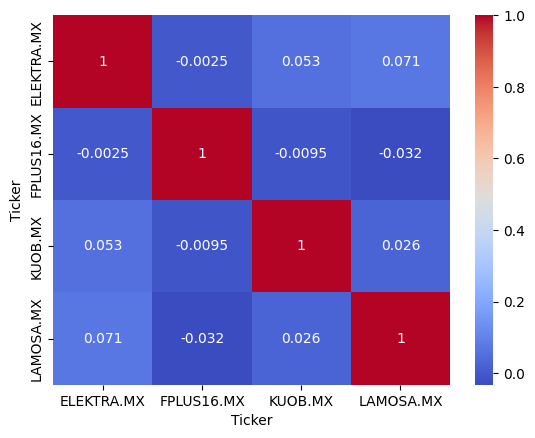

In [ ]:
tickets_final_new = result["final_tickers"]

prices_portfolio_final = yf.download(tickets_final_new, start = start_date, end = end_date)["Close"]

returns_portfolio_final = prices_portfolio_final.pct_change().dropna()

corr = returns_portfolio_final.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")

In [ ]:
total = np.tril(np.abs(corr), k=-1).sum()
total

np.float64(0.19478990693539003)